In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics 

In [2]:
data=pd.read_csv("D:\Codes\Python\Diabetes\Dataset of Diabetes .csv")
datacpy=data.copy()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Muthu\AppData\Local\Temp\ipykernel_7672\2970873125.py:1: SyntaxWarning: invalid escape sequence '\C'
  data=pd.read_csv("D:\Codes\Python\Diabetes\Dataset of Diabetes .csv")


Cr: Creatinine
A waste product measured in blood and urine to assess kidney function.

HbA1c: Hemoglobin A1c
A measure of the average blood sugar levels over the past 2-3 months, used in diabetes management.

Chol: Cholesterol
A type of lipid found in the blood; high levels can increase the risk of heart disease.

TG: Triglycerides
A type of fat (lipid) in the blood; high levels can be a risk factor for cardiovascular diseases.

HDL: High-Density Lipoprotein
Often referred to as "good cholesterol" because it helps remove other forms of cholesterol from the bloodstream.

LDL: Low-Density Lipoprotein
Known as "bad cholesterol" because high levels can lead to the buildup of cholesterol in arteries.

VLDL: Very Low-Density Lipoprotein
A type of lipoprotein that carries triglycerides in the blood; like LDL, it is considered harmful in excess.

In [3]:
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [4]:
data.drop('ID',axis=1,inplace=True) 
data.drop('No_Pation',axis=1,inplace=True)   

In [5]:
data["Gender"].unique()

array(['F', 'M', 'f'], dtype=object)

In [6]:
data["CLASS"]=data["CLASS"].replace(to_replace={'N ':'N','Y':'P','Y ':'P'})

In [7]:
data["CLASS"].unique()

array(['N', 'P'], dtype=object)

In [8]:
data["CLASS"]=data["CLASS"].map({'N':0,'P':1})

In [9]:
data["Gender"]=data["Gender"].replace(to_replace={'f':'F'})

In [10]:
data["Gender"]=data["Gender"].map({'F':0,'M':1})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int64  
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 93.9 KB


In [12]:
data.shape

(1000, 12)

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(826, 12)

In [15]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
5,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1
992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1
993,1,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1
994,1,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,1


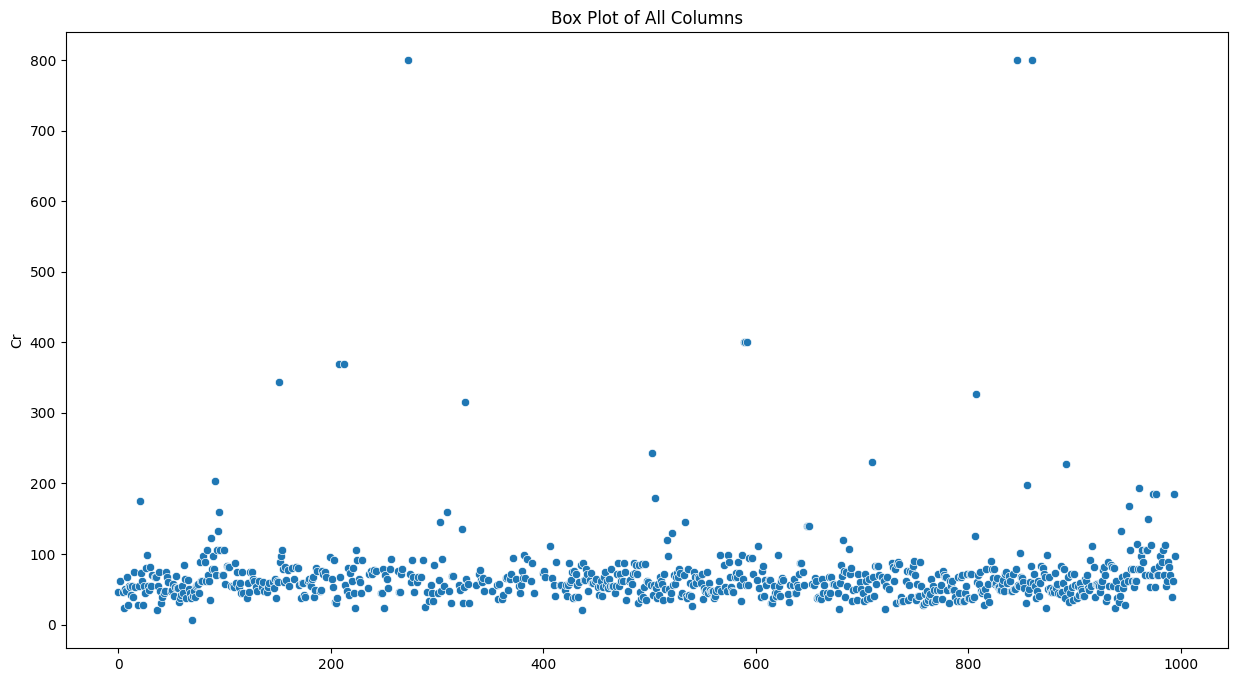

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.scatterplot(data=data["Cr"])
plt.title("Box Plot of All Columns")
plt.show()

In [17]:
data.shape

(826, 12)

In [18]:
from scipy.stats import zscore

def handle_outliers_zscore(df, columns, threshold=3):
    df_cleaned = df.copy()
    for column in columns:
        z_scores = zscore(df_cleaned[column])  
        df_cleaned = df_cleaned[(np.abs(z_scores) <= threshold)]

    return df_cleaned

numerical_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
data = handle_outliers_zscore(data, numerical_columns)
print("Original Data Shape:", data.shape)
print("After Replacing Outliers Shape:", data.shape)


Original Data Shape: (731, 12)
After Replacing Outliers Shape: (731, 12)


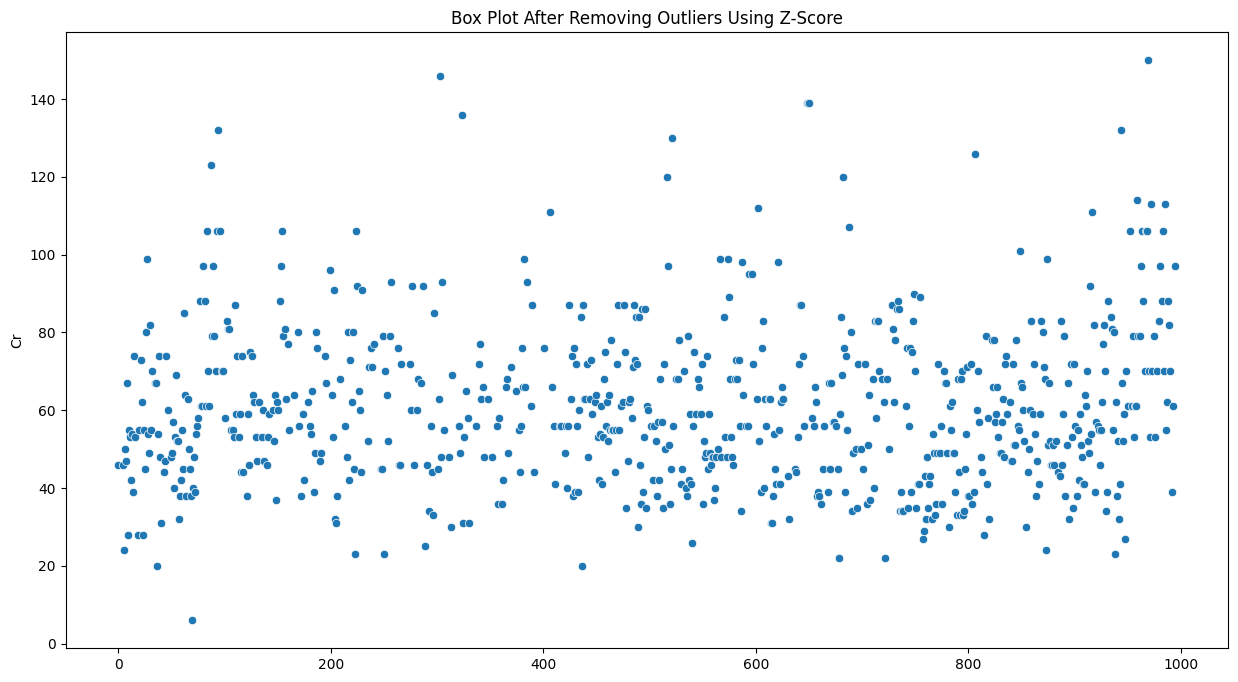

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.scatterplot(data=data["Cr"])
plt.title("Box Plot After Removing Outliers Using Z-Score")
plt.show()

In [20]:
data.head(3)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
5,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0


In [21]:
data["CLASS"].value_counts()

CLASS
1    644
0     87
Name: count, dtype: int64

In [22]:
smote = SMOTE(random_state=42)
x=data.drop("CLASS",axis=1)
y=data["CLASS"]
x,y= smote.fit_resample(x,y)

In [23]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
5,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
7,1,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,62,6.3,82,6.7,5.3,2.0,1.0,3.5,0.9,30.1,1
990,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1
992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1
993,1,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1


In [24]:
data=pd.DataFrame(x,columns=datacpy.columns[2:-1])

In [25]:
data["CLASS"]=y

In [26]:
data.shape

(1288, 12)

In [27]:
data.drop_duplicates(inplace=True)
data.shape

(1285, 12)

In [28]:
data["CLASS"].value_counts()

CLASS
1    644
0    641
Name: count, dtype: int64

In [29]:
sx=preprocessing.StandardScaler()
sx.fit(data.drop("CLASS",axis=1))
feat=sx.transform(data.drop("CLASS",axis=1))
y=data["CLASS"]

In [30]:
data=pd.DataFrame(feat,columns=data.columns[:-1])

In [31]:
data.head(3)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.737883,0.062794,0.058205,-0.697614,-0.648916,-0.343397,-0.966608,3.227599,-1.257799,-0.564507,-0.432639
1,1.355229,-1.783428,1.467507,-0.697614,-0.648916,0.316563,-0.871066,-1.010190,-0.607519,-0.676590,-1.028505
2,-0.737883,-0.480212,-1.351097,-1.773473,-0.978279,-1.569038,-0.871066,-0.480466,-1.149419,-0.676590,-1.028505


In [32]:
cm=data.corr()
cm

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
Gender,1.000000,0.246230,0.185698,0.224137,0.274715,0.072596,0.191266,-0.134138,0.025061,0.175754,0.302148
AGE,0.246230,1.000000,0.261325,0.163969,0.540252,0.129745,0.262859,-0.007840,-0.025002,0.071053,0.584997
Urea,0.185698,0.261325,1.000000,0.599229,0.097142,0.104306,0.153940,-0.025162,-0.007928,0.070102,0.142110
Cr,0.224137,0.163969,0.599229,1.000000,-0.061790,0.009106,0.090787,-0.017995,0.045702,0.091462,-0.009403
HbA1c,0.274715,0.540252,0.097142,-0.061790,1.000000,0.310245,0.347214,-0.064744,-0.031377,0.183924,0.698763
Chol,0.072596,0.129745,0.104306,0.009106,0.310245,1.000000,0.415873,0.005910,0.421948,0.171286,0.209921
TG,0.191266,0.262859,0.153940,0.090787,0.347214,0.415873,1.000000,-0.139439,0.089410,0.246255,0.305394
HDL,-0.134138,-0.007840,-0.025162,-0.017995,-0.064744,0.005910,-0.139439,1.000000,-0.198345,-0.026913,-0.016026
LDL,0.025061,-0.025002,-0.007928,0.045702,-0.031377,0.421948,0.089410,-0.198345,1.000000,0.081869,-0.077662
VLDL,0.175754,0.071053,0.070102,0.091462,0.183924,0.171286,0.246255,-0.026913,0.081869,1.000000,0.215898


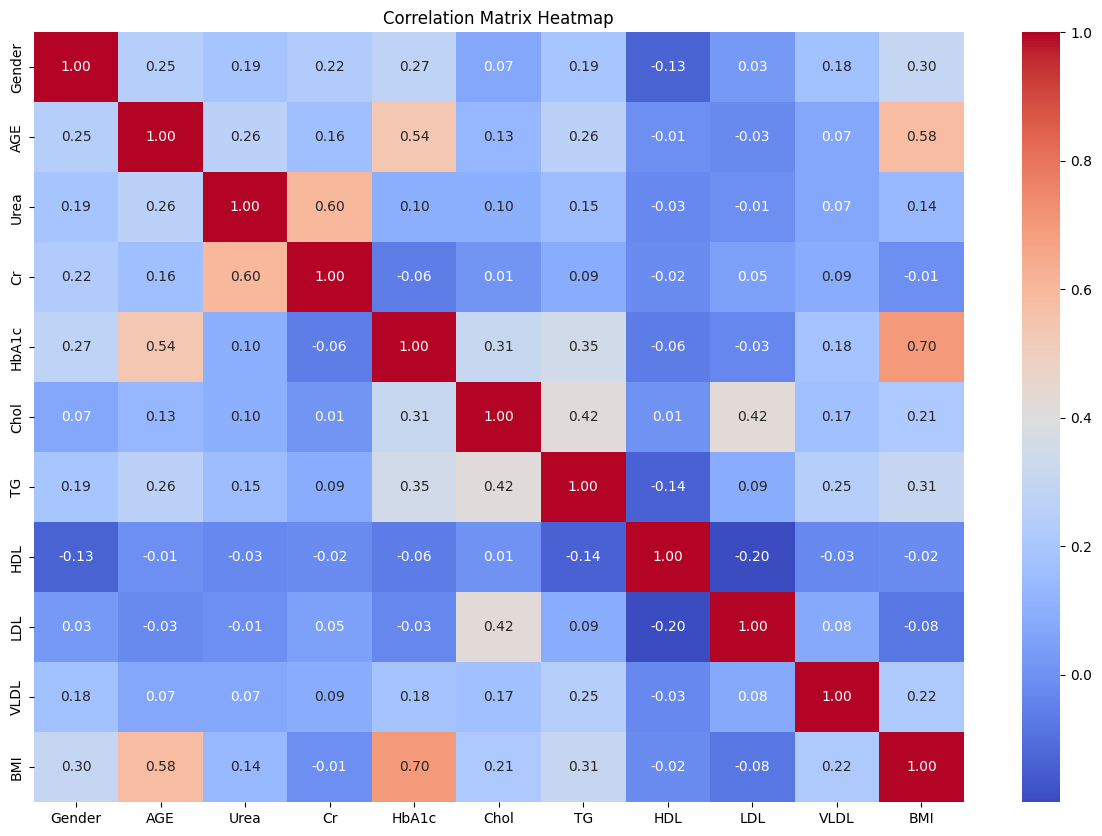

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
x=data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [35]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
a=model.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9906832298136646
[[151   0]
 [  3 168]]
0.9824561403508771
1.0
0.9911504424778761
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       151
           1       1.00      0.98      0.99       171

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [37]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [10,15, 20,25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


rf = RandomForestClassifier(random_state=42)


random_search1 = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

random_search1.fit(x_train, y_train)

print("Best Parameters:", random_search1.best_params_)
print("Best Score:", random_search1.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15}
Best Score: 0.9916936528497409


In [38]:
a=random_search1.best_estimator_.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9906832298136646
[[151   0]
 [  3 168]]
0.9824561403508771
1.0
0.9911504424778761
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       151
           1       1.00      0.98      0.99       171

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [39]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
a=model2.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9906832298136646
[[151   0]
 [  3 168]]
0.9824561403508771
1.0
0.9911504424778761
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       151
           1       1.00      0.98      0.99       171

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [41]:
param_dist = {
    'max_depth': [5,10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}


dt = DecisionTreeClassifier(random_state=42)


random_search2 = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')


random_search2.fit(x_train, y_train)


print("Best Parameters:", random_search2.best_params_)
print("Best Score:", random_search2.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}
Best Score: 0.9906519861830743


In [42]:
a=random_search2.best_estimator_.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9906832298136646
[[150   1]
 [  2 169]]
0.9883040935672515
0.9941176470588236
0.9912023460410557
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.99      0.99      0.99       171

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [43]:
model3=SVC()
model3.fit(x_train,y_train)

SVC()

In [44]:
a=model3.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9658385093167702
[[151   0]
 [ 11 160]]
0.935672514619883
1.0
0.9667673716012085
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       151
           1       1.00      0.94      0.97       171

    accuracy                           0.97       322
   macro avg       0.97      0.97      0.97       322
weighted avg       0.97      0.97      0.97       322



In [45]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    'C': [0.1, 1, 10, 100,110,115],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1,2, 3, 4, 5]
}

# Initialize the SVC model
svc = SVC(random_state=42)

# Initialize Randomized Search with cross-validation
grid_search1 = GridSearchCV(estimator=svc, param_grid=param_dist, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Randomized Search to the data
grid_search1.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Score:", grid_search1.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 10, 'degree': 1, 'kernel': 'rbf'}
Best Score: 0.9781681778929189


In [46]:
a=grid_search1.best_estimator_.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9720496894409938
[[151   0]
 [  9 162]]
0.9473684210526315
1.0
0.972972972972973
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       151
           1       1.00      0.95      0.97       171

    accuracy                           0.97       322
   macro avg       0.97      0.97      0.97       322
weighted avg       0.97      0.97      0.97       322



In [47]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=42)
model4=lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 473, number of negative: 490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 963, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491173 -> initscore=-0.035310
[LightGBM] [Info] Start training from score -0.035310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [48]:
a=model4.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9937888198757764
[[151   0]
 [  2 169]]
0.9883040935672515
1.0
0.9941176470588236
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       151
           1       1.00      0.99      0.99       171

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [49]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(random_state=42)
model5 = AdaBoostClassifier(estimator=base_estimator, random_state=42)
model5.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

In [50]:
a=model5.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9906832298136646
[[151   0]
 [  3 168]]
0.9824561403508771
1.0
0.9911504424778761
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       151
           1       1.00      0.98      0.99       171

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [51]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model6=xgb_clf.fit(x_train,y_train)

c:\Users\Muthu\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [52]:
a=model6.predict(x_test)
print(metrics.accuracy_score(y_test,a))
print(metrics.confusion_matrix(y_test,a))
print(metrics.recall_score(y_test,a))
print(metrics.precision_score(y_test,a))
print(metrics.f1_score(y_test,a))
print(metrics.classification_report(y_test,a))

0.9906832298136646
[[150   1]
 [  2 169]]
0.9883040935672515
0.9941176470588236
0.9912023460410557
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.99      0.99      0.99       171

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [53]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train.values,
    feature_names=x.columns,
    class_names=['Not Diabetic', 'Diabetic'],
    mode='classification'
)

# Choose an instance to explain
instance_index = 0
instance = x_test.iloc[instance_index].values

# Generate explanation for the chosen instance
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba
)

# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

c:\Users\Muthu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
